In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C3.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,performance_score,years_since_last_promotion,is_eligible_for_promotion,experience_level,training_effectiveness_ratio
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0,57.9,2,0,Senior,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0,66.5,2,1,Mid-Level,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0,52.8,5,0,Mid-Level,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0,36.3,2,0,Senior,25
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0,69.2,2,0,Entry-Level,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54805,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0,69.3,7,1,Lead/Principal,78
54806,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0,45.1,3,0,Mid-Level,56
54807,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0,78.5,1,1,Mid-Level,79
54808,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0,0.0,1,0,Entry-Level,0


In [3]:
bins = [0, 25, 35, 45, 60, 100]  # adjust ranges as needed
labels = ['<25', '25-35', '35-45', '45-60', '60+']

# Create a new column 'age_group'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df['age_group']

0        35-45
1        25-35
2        25-35
3        35-45
4        45-60
         ...  
54805    45-60
54806    35-45
54807    25-35
54808    25-35
54809    25-35
Name: age_group, Length: 54810, dtype: category
Categories (5, object): ['<25' < '25-35' < '35-45' < '45-60' < '60+']

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
promot_rate = df.groupby('age_group')['is_promoted'].mean().reset_index()
promot_rate

C:\Users\Kiruthik\AppData\Local\Temp\ipykernel_22072\2316289292.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promot_rate = df.groupby('age_group')['is_promoted'].mean().reset_index()


,age_group,is_promoted
0,<25,0.076385
1,25-35,0.088410
2,35-45,0.087841
3,45-60,0.065337
4,60+,0.064516


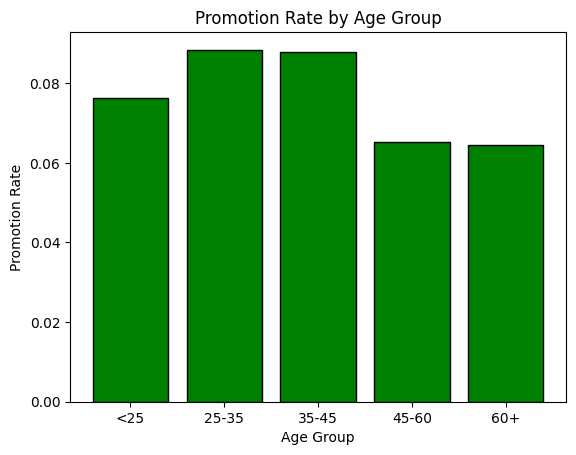

In [6]:
plt.bar(promot_rate['age_group'], promot_rate['is_promoted'], color='green', edgecolor='black')
plt.xlabel("Age Group")
plt.ylabel("Promotion Rate")
plt.title("Promotion Rate by Age Group")
plt.show()

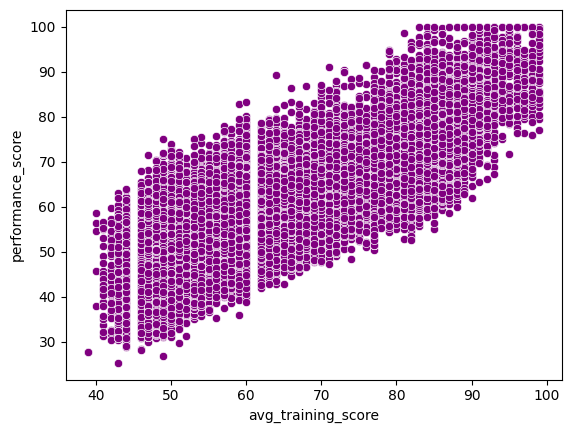

In [7]:
sns.scatterplot(
    data=df,
    x='avg_training_score',
    y='performance_score',
    color='purple'
)

plt.show()

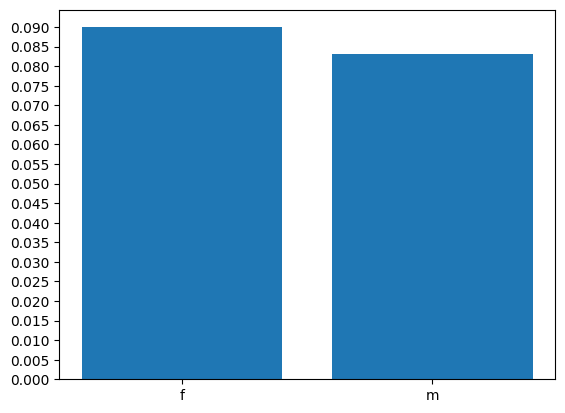

In [8]:
p_gen = df.groupby('gender')['is_promoted'].mean().reset_index()
plt.yticks(np.arange(0, 0.2, 0.005))
plt.bar(p_gen['gender'], p_gen['is_promoted'])
plt.show()

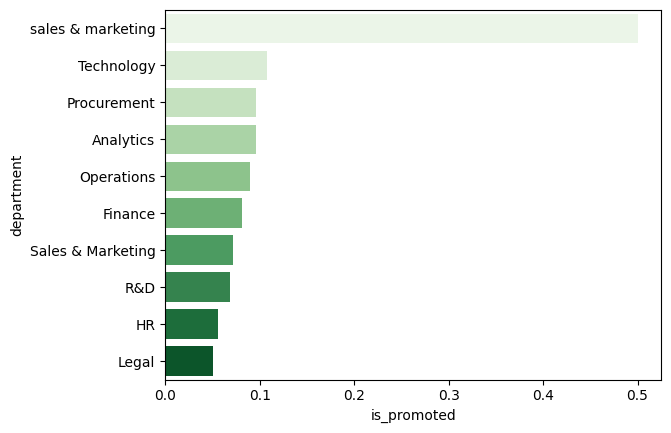

In [17]:
p_department = df.groupby('department')['is_promoted'].mean().reset_index().sort_values('is_promoted', ascending=False)

sns.barplot(
    data=p_department,
    x='is_promoted',
    y='department',
    hue='department',
    palette='Greens'
)
plt.show()

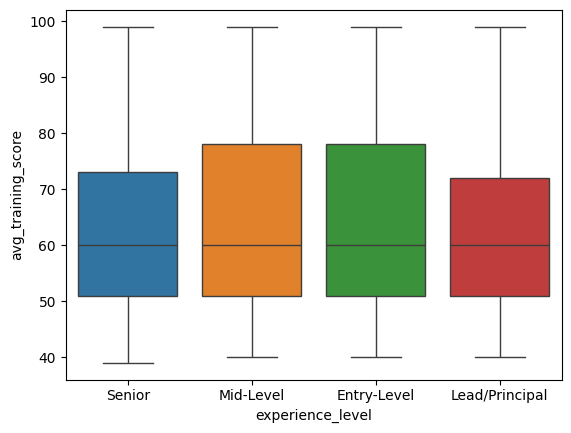

In [10]:
sns.boxplot(
    data=df,
    x='experience_level',
    y='avg_training_score',
    hue='experience_level'
)
plt.show()